# **Data Science and STEM Salaries**



Wanxing Dai


## Instructions

“Data Scientist” is one of the hottest jobs on the market today, as you’re surely aware. Over 60,000
data scientist salaries were scraped from levels.fyi along with some information about the employee
submitting the data. Using this data, we want you to figure out what factors best predict the overall
total compensation of a data scientist. Your task is to create a 1-4 page PDF containing your
findings. This should include any relevant graphs and tables. Please also include a file with your
raw code for our review.
Please format the PDF as if you are going to present it to someone who is familiar with analytics
concepts but is not an expert in the field. This PDF will be presented in your WAF interview. For the
format of this PDF, feel free to create a PowerPoint Presentation, Jupyter Notebook, Google/Word
Doc, Tableau Dashboard, or any other product you are comfortable with.
Note: The timeframe for this challenge has been shortened so that you don’t spend too much
time on it. We do not expect your final deliverable to look like a professional slide deck. We
suggest you spend most of your time on understanding the data and finding insights -- a basic
presentation is fine as long as you get the relevant information across.
The dataset is available on Kaggle at this link. Be sure to look through the data on Kaggle, as each
column has a short description explaining what its values mean.
Our team has looked at the data and given you a few tasks that you may be interested in completing.
You may choose to tackle some, all, or none of them. Again, however, you are free to examine and
present the data however you like.

1. Does the data have any interesting quirks or features? Missing rows/numbers? How are the
distributions for each column? Are there any important data cleaning or data processing tasks you
need to complete before you start building a model?
2. What can you tell us about the most well-paid individuals? What about their experience,
characteristics, or position makes them well-paid?
3. There are 28 columns you can use to predict total yearly compensation. Which columns did you
use? How did you come to that conclusion? Are there any variables that are highly correlated with
each other in either direction?
4. Is it “worth it” to pursue a graduate degree in exchange for potentially higher compensation? Be
prepared to defend your assumptions. (Note: this question is intentionally ambiguous – we encourage
you to come up with your own interpretation!)

**Data Source**

https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries


In [ ]:
!pip install pyclustertend
!pip install scikit-fuzzy
!pip install pyclustertend
from IPython.display import clear_output
clear_output()

In [ ]:
import numpy as np
import pandas as pd
from itertools import chain
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [ ]:
# import data
# --------------------------------------------
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/My Drive/ICU_Data_Challenge
df = pd.read_csv('Levels_Fyi_Salary_Data.csv')
data = df
print("shape: ", df.shape)
df.head()

shape:  (62642, 29)


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

In [ ]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data cleaning

In [ ]:
# check missing values
# --------------------------------------------
print("Count of missing values in each column:")
df.isna().sum()

Count of missing values in each column:


timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

The column gender, otherdetails, Race, and Education have over 15000
missing values.

In [ ]:
# check missing values
# --------------------------------------------
print("Count of maximum missing values in row:")
np.max(df.isna().sum(axis=1))

Count of maximum missing values in row:


6

In [ ]:
df_clean = df.dropna(axis=0)
df_clean.drop(columns=['rowNumber'], inplace=True)
df_clean

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
15710,1/27/2020 22:59:06,Google,L6,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,Distributed Systems (Back-End),210000.0,145000.0,45000.0,Male,Asian - PhD,7472,807.0,0,0,1,0,0,1,0,0,0,0,Asian,PhD
23532,7/3/2020 19:56:38,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000.0,1000.0,11000.0,Male,"Race: Two or More Races, Academic Level: Bache...",11521,819.0,0,1,0,0,0,0,0,1,0,0,Two Or More,Bachelor's Degree
23533,7/3/2020 20:03:57,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000.0,125000.0,36000.0,Male,"Race: Asian, Academic Level: Bachelor’s degree",7413,807.0,0,1,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
23534,7/3/2020 20:05:37,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000.0,38000.0,20000.0,Male,"Race: Asian, Academic Level: Master’s degree",11527,819.0,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
23535,7/3/2020 20:19:06,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000.0,22000.0,0.0,Male,"Race: White, Academic Level: Bachelor’s degree",7419,807.0,0,1,0,0,0,0,1,0,0,0,White,Bachelor's Degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,2/15/2021 19:50:36,Facebook,M2,Software Engineering Manager,1470000,"Menlo Park, CA",9.0,7.0,Full Stack,290000.0,1100.0,80000.0,Male,"Title: Engineering Manager, Race: Asian, Acade...",7300,807.0,0,1,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
61982,3/9/2021 17:03:07,Google,L10,Product Manager,4500000,"San Francisco, CA",20.0,14.0,Consumer,450000.0,3700.0,350000.0,Male,"Title: Vp, Race: Asian, Academic Level: Master...",7419,807.0,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
61984,3/25/2021 10:45:03,Zapier,L8,Software Engineering Manager,1605000,"Denver, CO",16.0,2.0,Full Stack,250000.0,1305.0,50000.0,Female,"Remote, Title: Vp Of Engineering, Race: White,...",7548,751.0,1,0,0,0,0,0,1,0,0,0,White,Master's Degree
61987,5/18/2021 15:34:21,Facebook,D1,Software Engineering Manager,2372000,"Menlo Park, CA",22.0,2.0,ML / AI,315000.0,1933.0,124000.0,Male,"Title: Engineering Director, Facebook Ai, Race...",7300,807.0,1,0,0,0,0,0,0,0,1,0,Black,Master's Degree


Convert timstamp to datetime

In [ ]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['year'] = df_clean['timestamp'].dt.year
df_clean['month'] = df_clean['timestamp'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

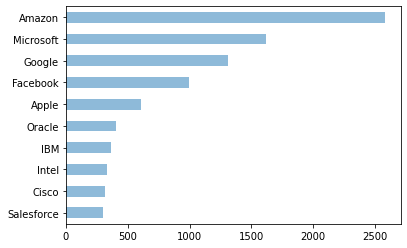

In [ ]:
df_clean['company'].value_counts()
df_clean['company'].value_counts()[0:10].sort_values().plot.barh(alpha = 0.5)

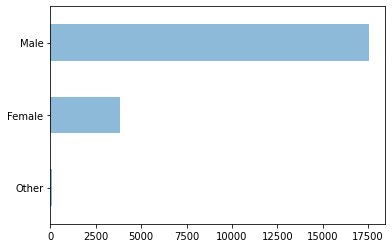

In [ ]:
df_clean['gender'].value_counts()
df_clean['gender'].value_counts().sort_values().plot.barh(alpha = 0.5)

In [ ]:
df_clean['otherdetails'].value_counts()

Race: Asian, Academic Level: Master’s degree                                                                  1205
Race: White, Academic Level: Bachelor’s degree                                                                1069
Race: Asian, Academic Level: Bachelor’s degree                                                                 968
Title: Software Engineer, Race: Asian, Academic Level: Master’s degree                                         722
Title: Software Engineer, Race: Asian, Academic Level: Bachelor’s degree                                       659
                                                                                                              ... 
$13k relocation budget, Title: Production Engineer, Race: White, Academic Level: Bachelor’s degree               1
7.5K relocation (Remote), Title: Applied Researcher, Race: Asian, Academic Level: Master’s degree                1
Title: System Development Engineer Ii, Race: White, Academic Level: Master’s deg

In [ ]:
df_clean[df_clean['otherdetails']=='7.5K relocation (Remote), Title: Applied Researcher, Race: Asian, Academic Level: Master’s degree']

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,year,month
42091,2021-02-15 12:42:06,eBay,SE 2,Data Scientist,176000,"San Jose, CA",2.0,0.0,general,133000.0,13000.0,30000.0,Male,"7.5K relocation (Remote), Title: Applied Resea...",7422,807.0,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree,2021,2


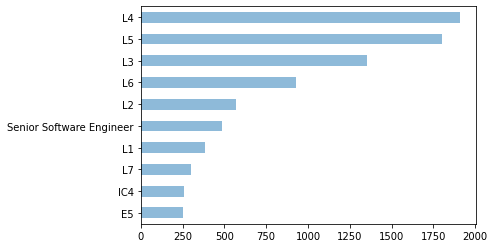

In [ ]:
df_clean['level'].value_counts()[0:10].sort_values().plot.barh(alpha = 0.5)

In [ ]:
len(df_clean['tag'].unique()), len(df_clean['level'].unique())

(1542, 1601)

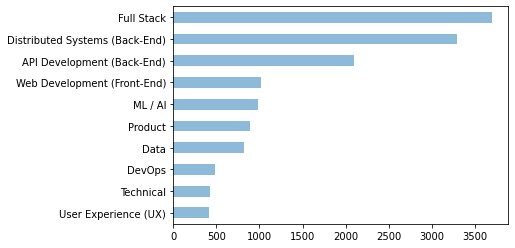

In [ ]:
df_clean['tag'].value_counts()[0:10].sort_values().plot.barh(alpha = 0.5)

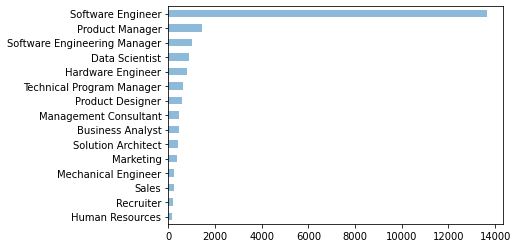

In [ ]:
df_clean['title'].value_counts().sort_values().plot.barh(alpha = 0.5)

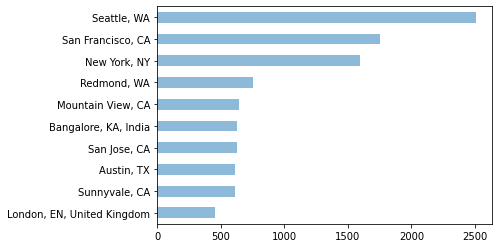

In [ ]:
df_clean['location'].value_counts()[0:10].sort_values().plot.barh(alpha = 0.5)

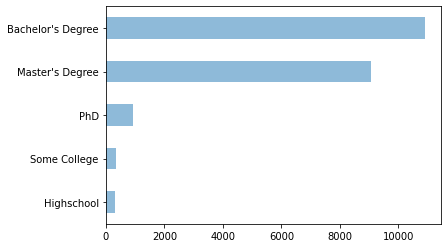

In [ ]:
df_clean['Education'].value_counts().sort_values().plot.barh(alpha = 0.5)

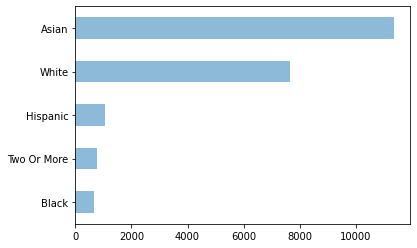

In [ ]:
df_clean['Race'].value_counts().sort_values().plot.barh(alpha = 0.5)

In [ ]:
df_clean

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,year,month
15710,2020-01-27 22:59:06,Google,L6,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,Distributed Systems (Back-End),210000.0,145000.0,45000.0,Male,Asian - PhD,7472,807.0,0,0,1,0,0,1,0,0,0,0,Asian,PhD,2020,1
23532,2020-07-03 19:56:38,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000.0,1000.0,11000.0,Male,"Race: Two or More Races, Academic Level: Bache...",11521,819.0,0,1,0,0,0,0,0,1,0,0,Two Or More,Bachelor's Degree,2020,7
23533,2020-07-03 20:03:57,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000.0,125000.0,36000.0,Male,"Race: Asian, Academic Level: Bachelor’s degree",7413,807.0,0,1,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree,2020,7
23534,2020-07-03 20:05:37,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000.0,38000.0,20000.0,Male,"Race: Asian, Academic Level: Master’s degree",11527,819.0,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree,2020,7
23535,2020-07-03 20:19:06,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000.0,22000.0,0.0,Male,"Race: White, Academic Level: Bachelor’s degree",7419,807.0,0,1,0,0,0,0,1,0,0,0,White,Bachelor's Degree,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,2021-02-15 19:50:36,Facebook,M2,Software Engineering Manager,1470000,"Menlo Park, CA",9.0,7.0,Full Stack,290000.0,1100.0,80000.0,Male,"Title: Engineering Manager, Race: Asian, Acade...",7300,807.0,0,1,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree,2021,2
61982,2021-03-09 17:03:07,Google,L10,Product Manager,4500000,"San Francisco, CA",20.0,14.0,Consumer,450000.0,3700.0,350000.0,Male,"Title: Vp, Race: Asian, Academic Level: Master...",7419,807.0,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree,2021,3
61984,2021-03-25 10:45:03,Zapier,L8,Software Engineering Manager,1605000,"Denver, CO",16.0,2.0,Full Stack,250000.0,1305.0,50000.0,Female,"Remote, Title: Vp Of Engineering, Race: White,...",7548,751.0,1,0,0,0,0,0,1,0,0,0,White,Master's Degree,2021,3
61987,2021-05-18 15:34:21,Facebook,D1,Software Engineering Manager,2372000,"Menlo Park, CA",22.0,2.0,ML / AI,315000.0,1933.0,124000.0,Male,"Title: Engineering Director, Facebook Ai, Race...",7300,807.0,1,0,0,0,0,0,0,0,1,0,Black,Master's Degree,2021,5


In [ ]:
df_clean.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
       'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More',
       'Race_Black', 'Race_Hispanic', 'Race', 'Education', 'year', 'month'],
      dtype='object')

In [ ]:
df_clean.duplicated().sum()

0

There is no missing data or duplicate in the df_clean now. We are ready to start explore the data.

## **Preliminary Exploratory Data Analysis (EDA)**



## **Pre-Analysis Questions**




### Basic statistics

In [ ]:
# # define X and Y
# # --------------------------------------------
X = pd.get_dummies(df_clean, columns=['gender'])
X = pd.get_dummies(X, columns=['title'])
X = X.drop(['totalyearlycompensation','basesalary', 'bonus','stockgrantvalue', 'Race', 'Education','location','otherdetails','tag','level','timestamp','company'], axis=1).copy()
Y = df_clean["totalyearlycompensation"]

# descriptive statistics
# --------------------------------------------
X.describe()

,yearsofexperience,yearsatcompany,cityid,dmaid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,year,month,gender_Female,gender_Male,gender_Other,title_Business Analyst,title_Data Scientist,title_Hardware Engineer,title_Human Resources,title_Management Consultant,title_Marketing,title_Mechanical Engineer,title_Product Designer,title_Product Manager,title_Recruiter,title_Sales,title_Software Engineer,title_Software Engineering Manager,title_Solution Architect,title_Technical Program Manager
count,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.00000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000
mean,7.126899,2.706566,10178.295200,561.286046,0.421031,0.506575,0.042842,0.013940,0.015752,0.528832,0.355606,0.035454,0.030761,0.049394,2020.640119,6.346266,0.179499,0.815761,0.004740,0.020306,0.040565,0.036290,0.00776,0.020863,0.016588,0.011709,0.027880,0.067190,0.009897,0.010130,0.634915,0.047488,0.019005,0.029413
std,5.849500,3.328219,7679.321521,315.717158,0.493736,0.499968,0.202505,0.117244,0.124518,0.499180,0.478708,0.184928,0.172673,0.216693,0.479976,3.093971,0.383779,0.387688,0.068683,0.141047,0.197285,0.187015,0.08775,0.142930,0.127726,0.107578,0.164632,0.250357,0.098994,0.100137,0.481465,0.212686,0.136544,0.168965
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,7322.000000,501.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,2.000000,8198.000000,751.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,10.000000,4.000000,11521.000000,807.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2021.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,45.000000,40.000000,47926.000000,881.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2021.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21521 entries, 15710 to 61991
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   yearsofexperience                   21521 non-null  float64
 1   yearsatcompany                      21521 non-null  float64
 2   cityid                              21521 non-null  int64  
 3   dmaid                               21521 non-null  float64
 4   Masters_Degree                      21521 non-null  int64  
 5   Bachelors_Degree                    21521 non-null  int64  
 6   Doctorate_Degree                    21521 non-null  int64  
 7   Highschool                          21521 non-null  int64  
 8   Some_College                        21521 non-null  int64  
 9   Race_Asian                          21521 non-null  int64  
 10  Race_White                          21521 non-null  int64  
 11  Race_Two_Or_More                    2

In [ ]:
# descriptive statistics of Y
Y.describe()

count    2.152100e+04
mean     1.979472e+05
std      1.331233e+05
min      1.000000e+04
25%      1.190000e+05
50%      1.740000e+05
75%      2.450000e+05
max      4.980000e+06
Name: totalyearlycompensation, dtype: float64

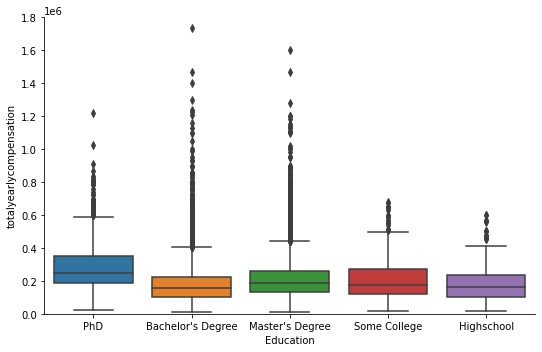

In [ ]:
ax = sns.catplot(x="Education", y="totalyearlycompensation", kind="box", data=df_clean, aspect=1.5)
ax.set(ylim=(0, 1800000))

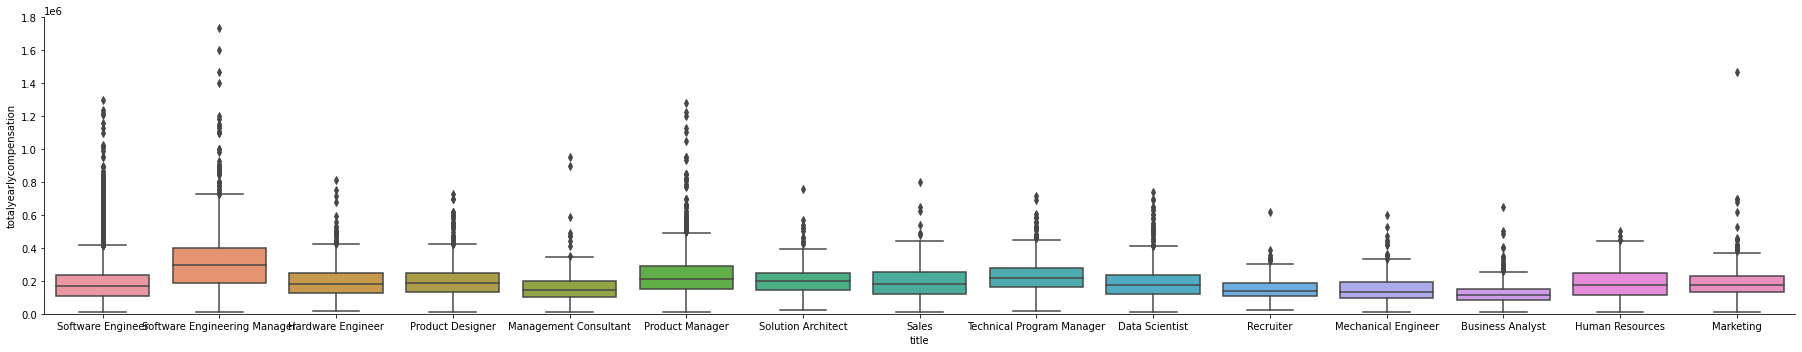

In [ ]:
ax = sns.catplot(x="title", y="totalyearlycompensation", kind="box", data=df_clean, aspect=5)
ax.set(ylim=(0, 1800000))

In [ ]:
df_clean.groupby('Education')['totalyearlycompensation'].median()

Education
Bachelor's Degree    156000.0
Highschool           161500.0
Master's Degree      187000.0
PhD                  250000.0
Some College         172000.0
Name: totalyearlycompensation, dtype: float64

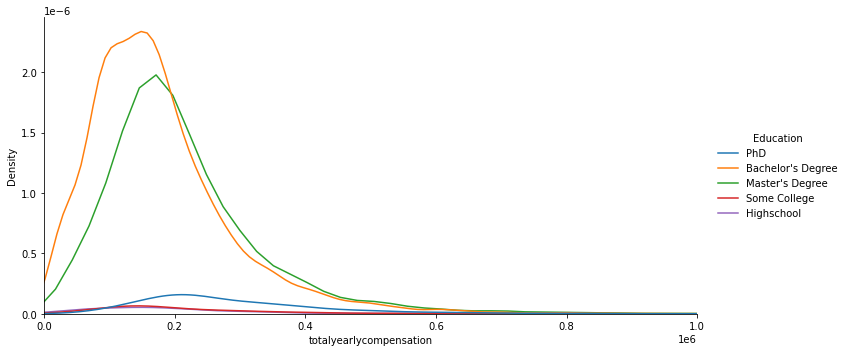

In [ ]:
ax = sns.displot(df_clean, x="totalyearlycompensation", hue="Education", kind="kde",aspect = 2)
ax.set(xlim=(0, 1000000))

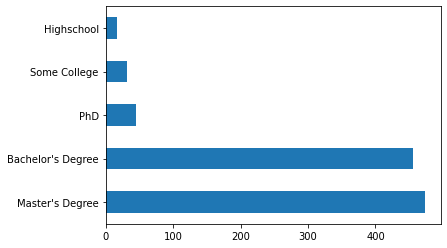

In [ ]:
df_clean[df_clean['title']=='Software Engineering Manager']['Education'].value_counts().plot.barh()

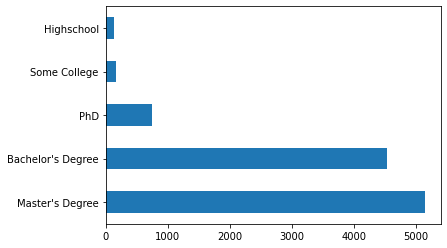

In [ ]:
df_clean[df_clean['totalyearlycompensation']>df_clean['totalyearlycompensation'].median()]['Education'].value_counts().plot.barh()

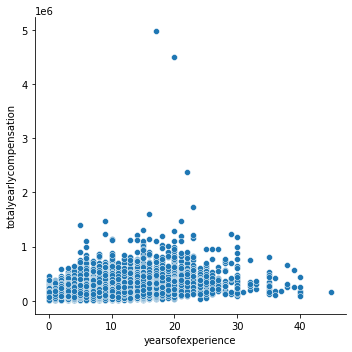

In [ ]:
sns.relplot(x="yearsofexperience", y="totalyearlycompensation", data=df_clean,aspect=1)

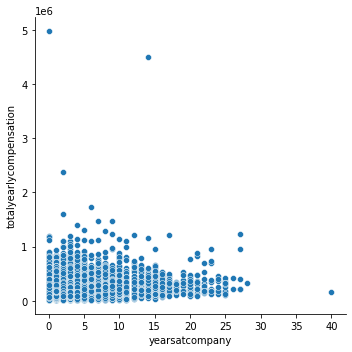

In [ ]:
sns.relplot(x="yearsatcompany", y="totalyearlycompensation", data=df_clean, aspect=1)

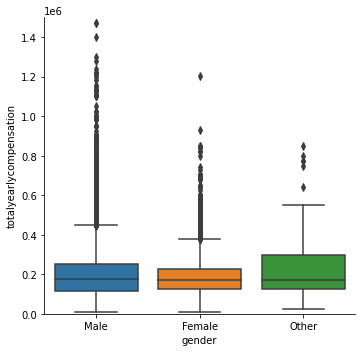

In [ ]:
ax = sns.catplot(x="gender", y="totalyearlycompensation", kind="box", data=df_clean)
ax.set(ylim=(0, 1500000))

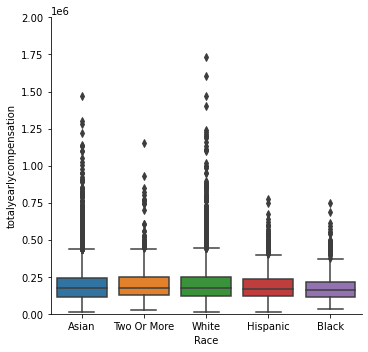

In [ ]:
ax = sns.catplot(x="Race", y="totalyearlycompensation", kind="box", data=df_clean)
ax.set(ylim=(0, 2000000))

### Pairwise relationship

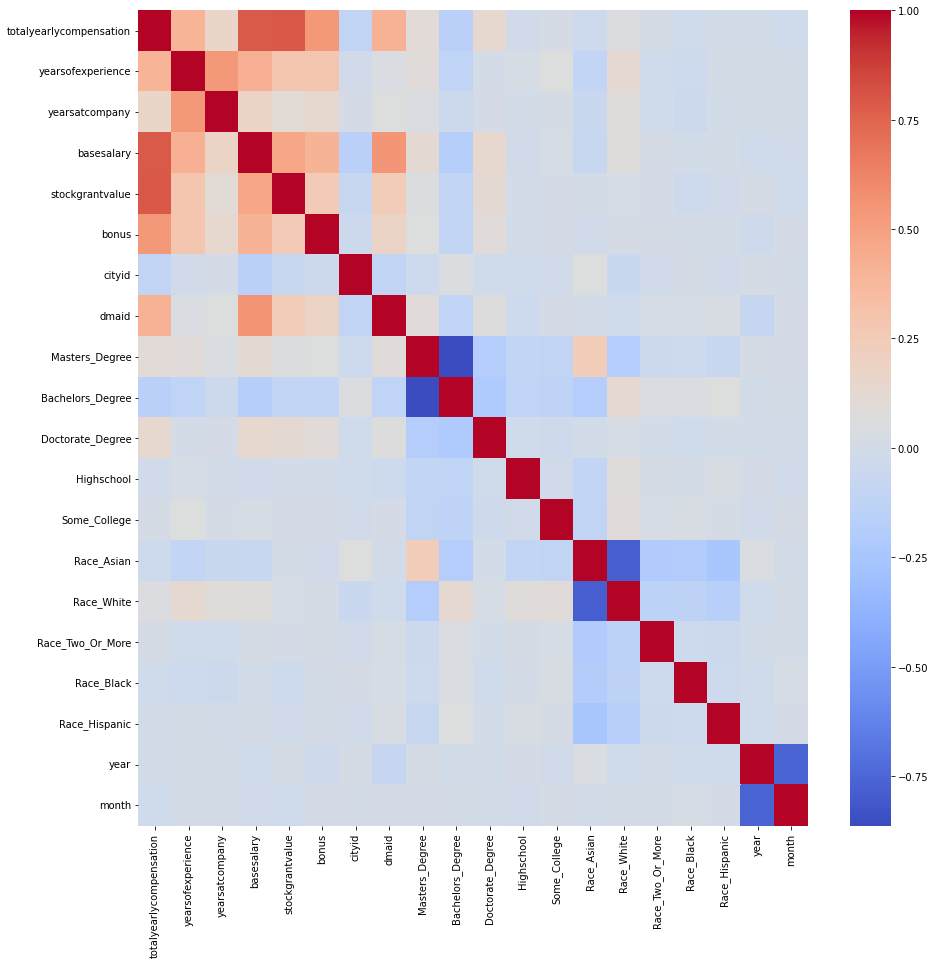

In [ ]:
plt.figure(figsize=(15,15))
cor = df_clean.corr()
sns.heatmap(cor, cmap='coolwarm', fmt='0.1f')
plt.show()

In [ ]:
#Correlation with output variable
cor_target = cor['totalyearlycompensation']
#Selecting highly correlated features
relevant_features = cor_target[abs(cor_target)>0.15]
relevant_features.sort_values(ascending=False)

totalyearlycompensation    1.000000
stockgrantvalue            0.794439
basesalary                 0.784558
bonus                      0.540633
dmaid                      0.410527
yearsofexperience          0.402809
yearsatcompany             0.167440
Bachelors_Degree          -0.155165
Name: totalyearlycompensation, dtype: float64

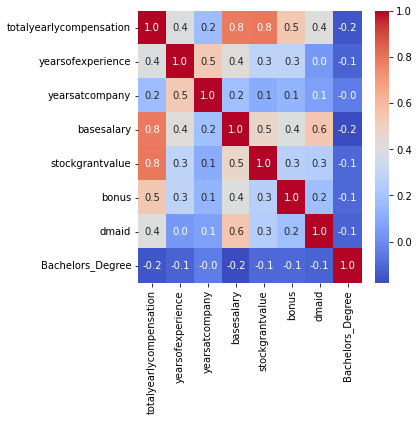

In [ ]:
plt.figure(figsize=(5,5))
cor = df_clean[relevant_features.index].corr()
sns.heatmap(cor, cmap='coolwarm', annot = True, fmt='0.1f')
plt.show()

# Modeling

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split 80% of data to train the supervised classifer and 20% for validation
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=12)

In [ ]:
# standardize the data
# --------------------------------------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X_train)
sX = pd.DataFrame(scaled_x, columns=X.columns) 
sX.describe()

,yearsofexperience,yearsatcompany,cityid,dmaid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,year,month,gender_Female,gender_Male,gender_Other,title_Business Analyst,title_Data Scientist,title_Hardware Engineer,title_Human Resources,title_Management Consultant,title_Marketing,title_Mechanical Engineer,title_Product Designer,title_Product Manager,title_Recruiter,title_Sales,title_Software Engineer,title_Software Engineering Manager,title_Solution Architect,title_Technical Program Manager
count,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04,1.721600e+04
mean,9.696395e-17,2.202776e-16,7.601829e-17,2.362190e-17,-4.758430e-16,1.740269e-16,-9.402330e-16,1.003926e-15,2.120216e-16,6.069984e-16,-1.096358e-15,1.029968e-16,1.179319e-15,5.241412e-16,1.641722e-13,-5.184179e-17,1.391261e-16,8.864501e-16,1.064071e-15,-1.987903e-16,-1.280120e-15,1.187815e-15,3.034750e-16,1.213533e-16,1.407344e-15,1.883415e-15,-3.813651e-16,-5.901929e-16,-5.327584e-16,-5.379384e-16,8.460549e-16,-9.263036e-16,1.878325e-15,-9.373278e-16
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00
min,-1.217016e+00,-8.132456e-01,-1.169128e+00,-1.782238e+00,-8.575016e-01,-1.008282e+00,-2.119288e-01,-1.196531e-01,-1.240713e-01,-1.059011e+00,-7.422877e-01,-1.926355e-01,-1.770042e-01,-2.294438e-01,-1.344798e+00,-1.720455e+00,-4.661337e-01,-2.109870e+00,-7.043980e-02,-1.434234e-01,-2.095234e-01,-1.911713e-01,-8.756452e-02,-1.467624e-01,-1.295105e-01,-1.089613e-01,-1.697163e-01,-2.680422e-01,-1.016299e-01,-9.956791e-02,-1.322438e+00,-2.223424e-01,-1.393631e-01,-1.702589e-01
25%,-7.041156e-01,-8.132456e-01,-3.704189e-01,-1.925899e-01,-8.575016e-01,-1.008282e+00,-2.119288e-01,-1.196531e-01,-1.240713e-01,-1.059011e+00,-7.422877e-01,-1.926355e-01,-1.770042e-01,-2.294438e-01,-1.344798e+00,-7.527656e-01,-4.661337e-01,4.739628e-01,-7.043980e-02,-1.434234e-01,-2.095234e-01,-1.911713e-01,-8.756452e-02,-1.467624e-01,-1.295105e-01,-1.089613e-01,-1.697163e-01,-2.680422e-01,-1.016299e-01,-9.956791e-02,-1.322438e+00,-2.223424e-01,-1.393631e-01,-1.702589e-01
50%,-3.621821e-01,-2.091233e-01,-2.570020e-01,6.006476e-01,-8.575016e-01,9.917856e-01,-2.119288e-01,-1.196531e-01,-1.240713e-01,9.442776e-01,-7.422877e-01,-1.926355e-01,-1.770042e-01,-2.294438e-01,7.436059e-01,2.149233e-01,-4.661337e-01,4.739628e-01,-7.043980e-02,-1.434234e-01,-2.095234e-01,-1.911713e-01,-8.756452e-02,-1.467624e-01,-1.295105e-01,-1.089613e-01,-1.697163e-01,-2.680422e-01,-1.016299e-01,-9.956791e-02,7.561791e-01,-2.223424e-01,-1.393631e-01,-1.702589e-01
75%,4.926515e-01,3.949990e-01,1.732313e-01,7.783327e-01,1.166179e+00,9.917856e-01,-2.119288e-01,-1.196531e-01,-1.240713e-01,9.442776e-01,1.347187e+00,-1.926355e-01,-1.770042e-01,-2.294438e-01,7.436059e-01,5.374863e-01,-4.661337e-01,4.739628e-01,-7.043980e-02,-1.434234e-01,-2.095234e-01,-1.911713e-01,-8.756452e-02,-1.467624e-01,-1.295105e-01,-1.089613e-01,-1.697163e-01,-2.680422e-01,-1.016299e-01,-9.956791e-02,7.561791e-01,-2.223424e-01,-1.393631e-01,-1.702589e-01
max,6.476487e+00,1.126920e+01,4.886636e+00,1.013131e+00,1.166179e+00,9.917856e-01,4.718566e+00,8.357496e+00,8.059881e+00,9.442776e-01,1.347187e+00,5.191151e+00,5.64

In [ ]:
Y.value_counts()

150000     324
200000     299
180000     263
170000     254
120000     250
          ... 
735000       1
517000       1
759000       1
1005000      1
4980000      1
Name: totalyearlycompensation, Length: 713, dtype: int64

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=33)
x2 = pca.fit_transform(X_train)

# Let's see the components
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_

array([0.99835905, 0.00164   , 0.00000064, 0.00000016, 0.00000012,
       0.00000001, 0.00000001, 0.00000001, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

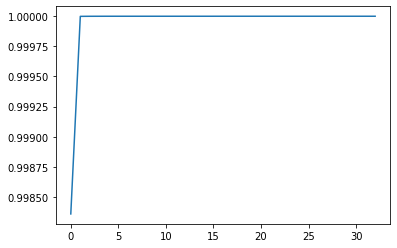

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

# See how much is contributed by the first few terms
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

pc_vs_variance
plt.plot(pc_vs_variance)

The data is clusterable as the hopkins statistics are close to 0.

In [ ]:
from pyclustertend import hopkins
n=len(X)
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
  n = len(sX)
  p = int(0.1 * n) 
  hopkins_stats.append(hopkins(X,p))
print(hopkins_stats)

[0.007443886129621276, 0.0066338990805949, 0.006904747659460445, 0.006868956910329086, 0.006529977711269354]


## Clustering

In [ ]:
from sklearn.cluster import KMeans
cluster_number_list = range(1,12)
avg_inertia_list = []
for k in cluster_number_list:
  sub_inertia_list=[]
  for i in range(0,3):
    kmeans=KMeans(n_clusters=k).fit(X)
    sub_inertia_list.append(kmeans.inertia_)
  avg_inertia_list.append(np.average(sub_inertia_list))

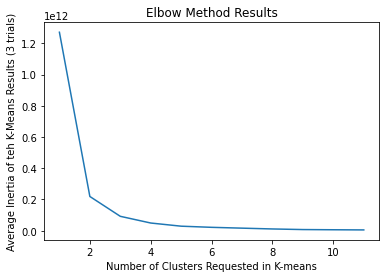

In [ ]:
plt.plot(cluster_number_list, avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of teh K-Means Results (3 trials)')
plt.title('Elbow Method Results')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=1000).fit(X)
df_clean['predicted_cluster_kmeans'] = kmeans.labels_
df_clean['predicted_cluster_kmeans'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    20542
1      979
Name: predicted_cluster_kmeans, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[(0.0, 1000000.0)]

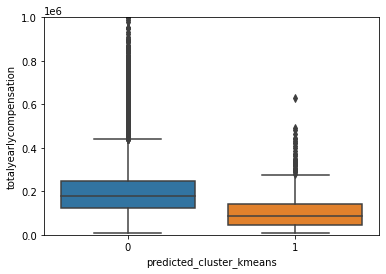

In [ ]:
ax = sns.boxplot(df_clean["predicted_cluster_kmeans"], y=df_clean['totalyearlycompensation'])
ax.set(ylim=(0, 1000000))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


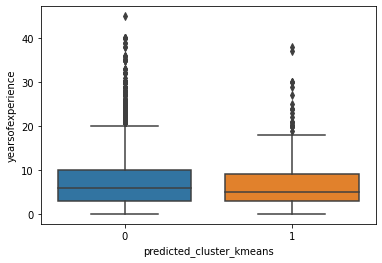

In [ ]:
sns.boxplot(df_clean["predicted_cluster_kmeans"], y=df_clean['yearsofexperience'])
plt.show()

In [ ]:
df_clean.groupby("predicted_cluster_kmeans")['title'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


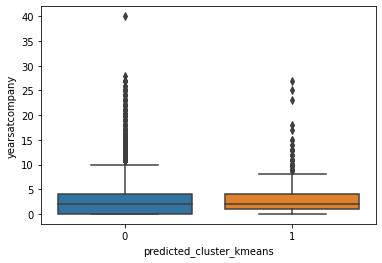

In [ ]:
sns.boxplot(df_clean["predicted_cluster_kmeans"], y=df_clean['yearsatcompany'])

In [ ]:
df_clean.groupby("predicted_cluster_kmeans")['Education'].value_counts()

predicted_cluster_kmeans  Education        
0                         Bachelor's Degree    10266
                          Master's Degree       8750
                          PhD                    901
                          Some College           333
                          Highschool             292
1                         Bachelor's Degree      633
                          Master's Degree        311
                          PhD                     21
                          Highschool               8
                          Some College             6
Name: Education, dtype: int64

In [ ]:
df_clean.groupby("predicted_cluster_kmeans")['Race'].value_counts()

predicted_cluster_kmeans  Race       
0                         Asian          10694
                          White           7448
                          Hispanic        1029
                          Two Or More      743
                          Black            628
1                         Asian            687
                          White            205
                          Black             34
                          Hispanic          33
                          Two Or More       20
Name: Race, dtype: int64

In [ ]:
df_clean.groupby("predicted_cluster_kmeans")['gender'].value_counts()

predicted_cluster_kmeans  gender
0                         Male      16721
                          Female     3723
                          Other        98
1                         Male        835
                          Female      140
                          Other         4
Name: gender, dtype: int64

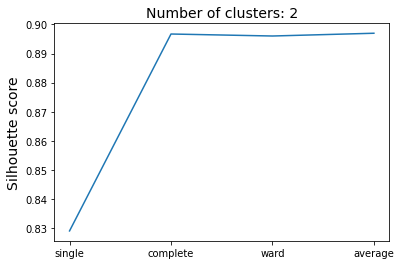

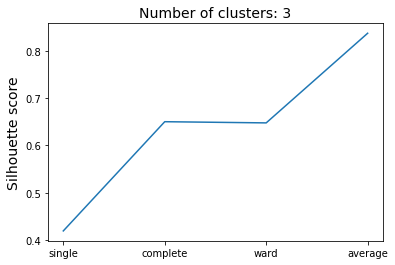

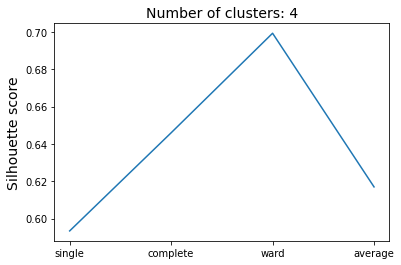

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
nb_clusters = [2, 3, 4]
linkages = ['single', 'complete', 'ward', 'average']
silhouette_scores = np.zeros(shape=(len(linkages), len(nb_clusters)))
for i, l in enumerate(linkages):
  for j, nbc in enumerate(nb_clusters):
    ag = AgglomerativeClustering(n_clusters=nbc, affinity='euclidean', linkage= l)
    Y_pred = ag.fit_predict(X)
    sls = silhouette_score(X, Y_pred, random_state=1000)
    silhouette_scores[i, j] = sls
for i in range(len(nb_clusters)):
  plt.plot(silhouette_scores[:, i])
  plt.ylabel('Silhouette score', fontsize=14)
  plt.title('Number of clusters: {}'.format(nb_clusters[i]), fontsize=14)
  plt.xticks(np.arange(len(linkages)), linkages)
  plt.show()

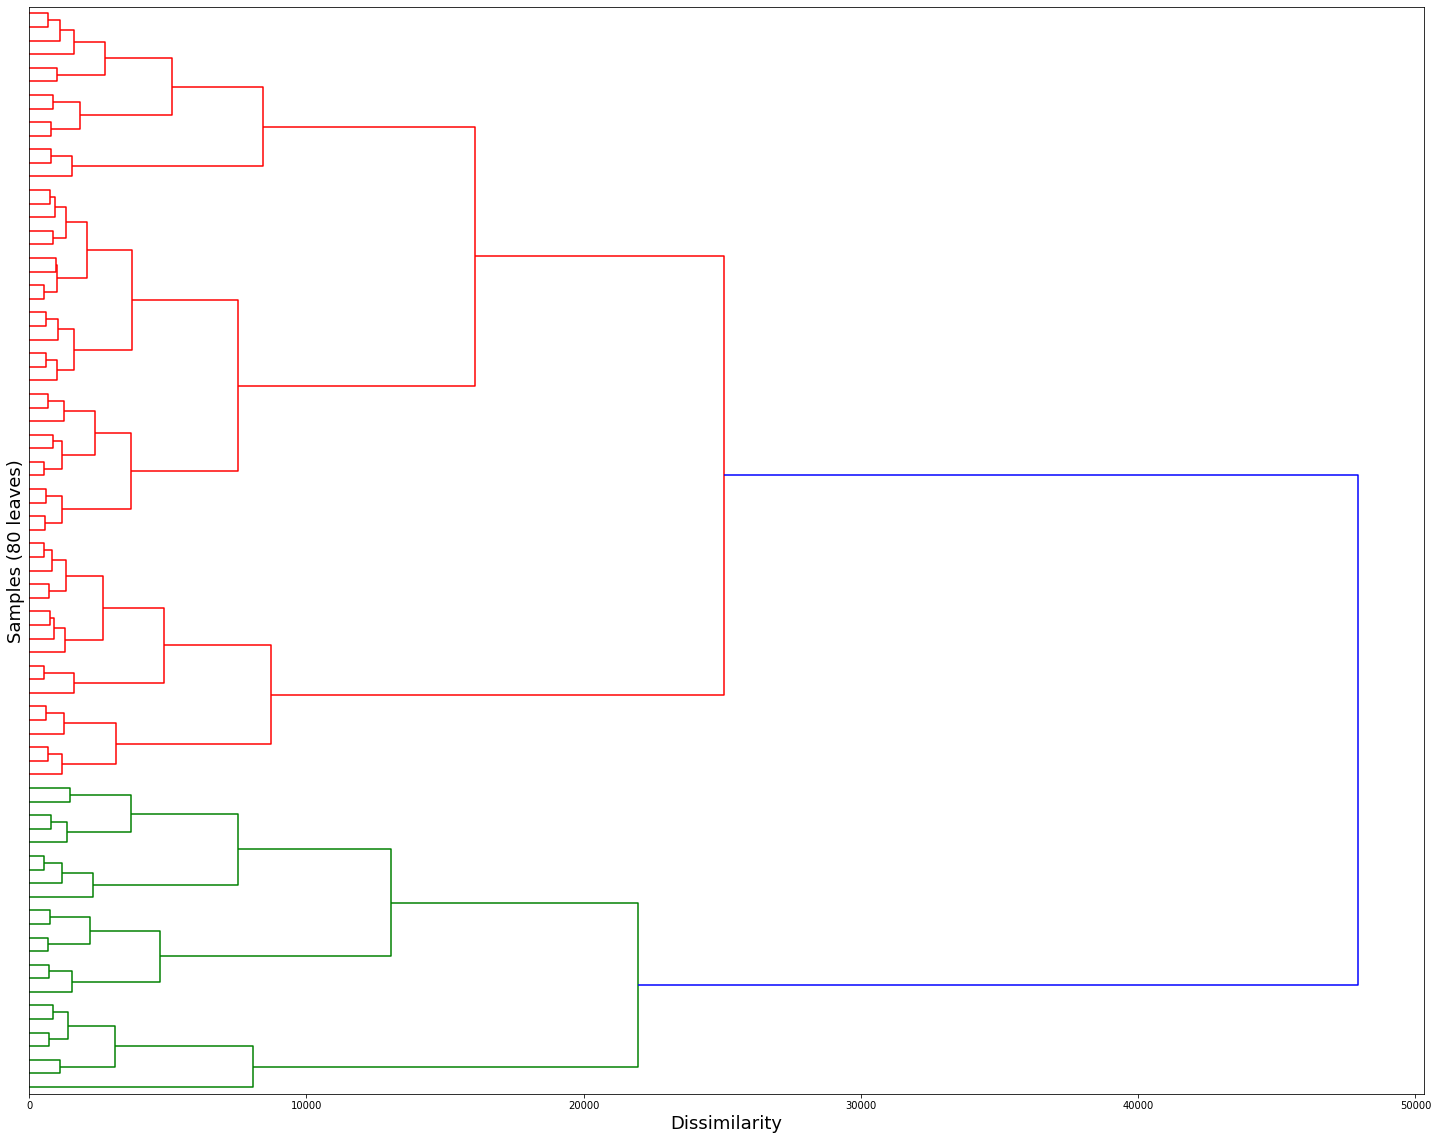

In [ ]:
# Show the truncated dendrogram for a ward linkage
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
dm = pdist(X, metric='euclidean')
Z = linkage(dm, method='complete')
fig, ax = plt.subplots(figsize=(25, 20))
d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=80, no_labels=True)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples (80 leaves)', fontsize=18)
plt.show()

## Linear Regression

In [ ]:
from sklearn import metrics
# Train a simple LinearRegression
regr = linear_model.LinearRegression()
regr.fit(sX, y_train)
scaled_test = scaler.transform(X_test)
predictions = regr.predict(scaled_test)
rmse_lc = mean_squared_error(y_test, predictions)** 0.5

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
rmse_lc

95830.46572361709

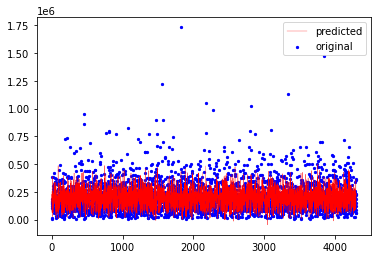

In [ ]:
x_ax = range(len(predictions))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, predictions, lw = 0.3,color="red", label="predicted")
plt.legend()
plt.show()

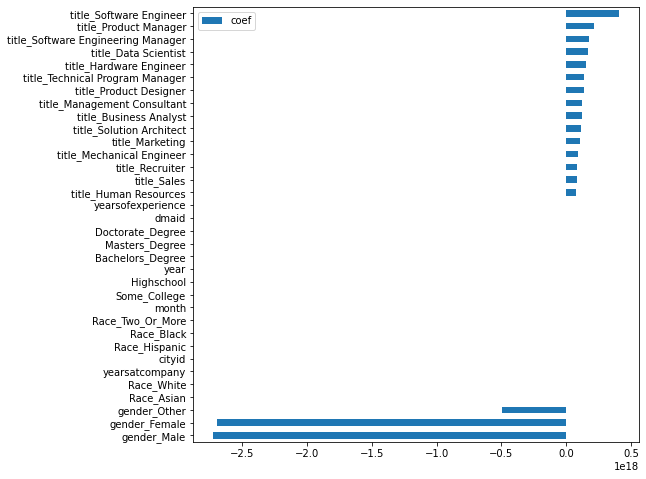

In [ ]:
coefficient = pd.DataFrame(regr.coef_, index=X.columns, columns=['coef'])

coefficient.sort_values(by=['coef'], ascending=True).plot.barh(figsize=(8,8))

## Decision Tree

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=10)
dt.fit(sX, y_train)
predictions = dt.predict(scaled_test)
rmse_dt = mean_squared_error(y_test, predictions)** 0.5

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
rmse_dt

137429.7565270858

## Neural Network

In [ ]:
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
sX = sX.values.reshape(sX.shape[0], sX.shape[1], 1)
print(sX.shape)

(17216, 34, 1)


In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(34, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [ ]:
X_train_pca = sX.reshape(sX.shape[0], sX.shape[1], 1)
print(sX.shape)
model.fit(sX, y_train, batch_size=12,epochs=10, verbose=0)

(17216, 34, 1)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 33, 32)            96        
                                                                 
 flatten_1 (Flatten)         (None, 1056)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                67648     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 67,809
Trainable params: 67,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ypred = model.predict(scaled_test)
print(ypred)
print(model.evaluate(X_train_pca, y_train))
print("RMSE: %.4f" % mean_squared_error(y_test, ypred)**0.5)

[[165728.7 ]
 [197894.19]
 [264920.72]
 ...
 [151107.17]
 [266469.34]
 [211287.92]]
538/538 [==============================] - 2s 3ms/step - loss: 11836275712.0000
11836275712.0
RMSE: 97282.9823


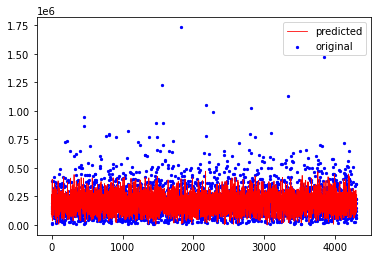

In [ ]:
x_ax = range(len(ypred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
highpay = df_clean[df_clean['totalyearlycompensation']>500000]

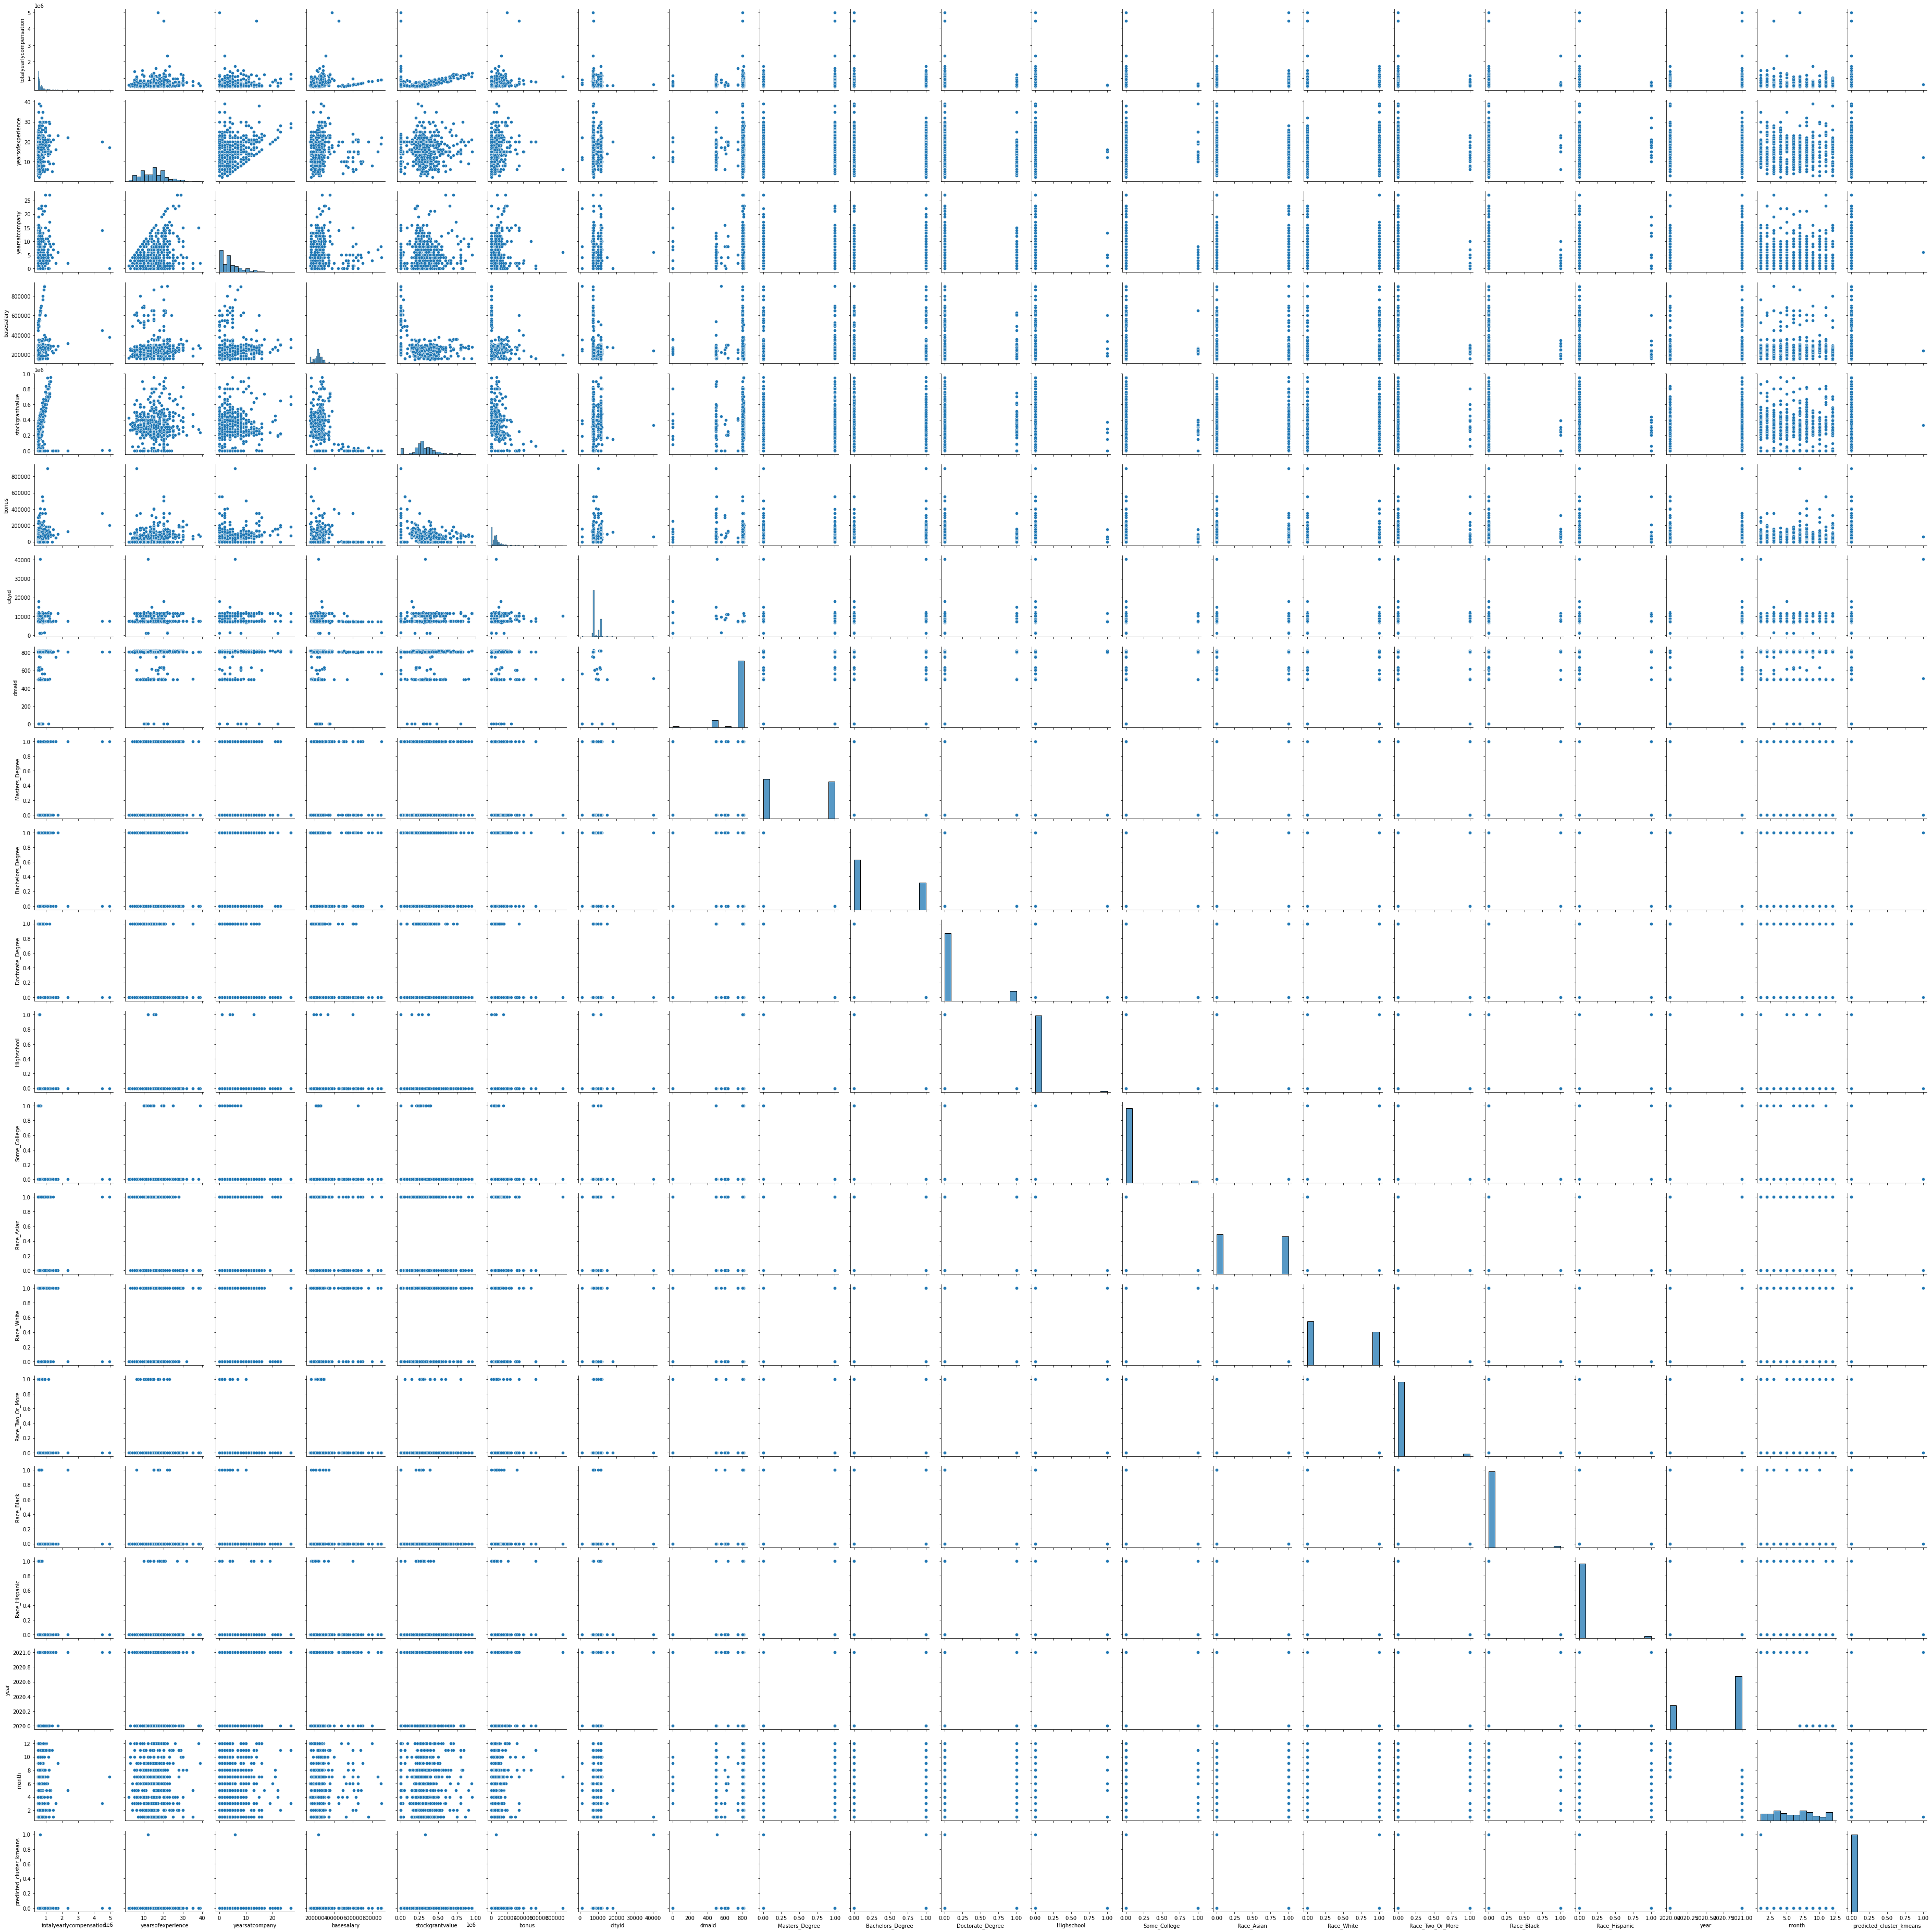

In [ ]:
sns.pairplot(highpay)